## Author - Badr Al Aghoury
## Last updated @ 15/1/2022

# Airflow Tutorial 

Contents - 
- Introduction ( What is Airflow)
-- What is a workflow
- traditional ETL approach and its Problems
- Intro to apache airflow
- Airflow dags 
- Advantages of airflow
- Applications
- Heirarchy of datascience
- Installing airflow through docker image
- An example of a dag
- Dag components
- Creating a pipeline in airflow

## What is airflow
Airflow is a platform to programmaticaly author, schedule and monitor workflows or data pipelines.
## What is a workflow
A workflow is a sequence of tasks which starts at a specific time or triggered by a an event. Workflows are commonly used used to handle big data processing pipelines.
## An example of a workflow
- download data from source
- send data somewhere else to process
- Monitor when the process is completed
- Get the result and generate the report
- Send the report out by email

## A tradition approach to ETL tasks and its problems
Consider a task where you are required to write a script to pull data from a database and send it to HDFS to process.
A traditional approach would be to schedule the tasks in the script to be executed sometime in the future.
This however raises some problems. 
- Failures:
retry if failure happens (how many times? how often?)
- Monitoring:
success or failure status, how long does the process runs?
- Dependencies:
Data dependencies: upstream data is missing.
Execution dependencies: job 2 runs after job 1 is finished.
- Scalability:
there is no centralized scheduler between different cron machines.
- Deployment:
deploy new changes constantly
- Process historic data:
backfill/rerun historical data

## Solution? Apache Airflow
Apache airflow is a an open-source software under the management of Apache Software Foundation.<br>
It is A workflow (data-pipeline) management system developed by Airbnb to tackle the problems discussed earlier. 
Apache airflow has many features and the software's main features and functionality could be summarised into the following main points.
- A framework to define tasks & dependencies in python
- Executing, scheduling, distributing tasks accross worker nodes.
- View of present and past runs, logging feature
- Extensible through plugins
- Nice UI, possibility to define REST interface
- Interact well with various databases (Mysql,Postgres,etc)

## Airflow Dags
In airflow workflows are called DAGS(Directed Acyclic Graph).
A DAG is a collection of all the tasks you want to run, organized in a way that reflects their relationships and dependencies.
DAG is a type of graph data structure.A Graph has 2 main parts; The vertices (nodes) where the data is stored and The edges (connections) which connect the nodes.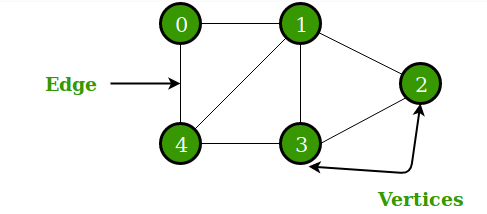


In general there are two types of graphs, undirected graphs ( The relationship exists in both directions, the edge has no direction)<br> and directed graphs (Direction matters, since the edges in a graph are all one-way)

Example of an undirected graph, where the relationship exists in both directions, the edge has no direction.For instance, If Mary was a friend of Francis, Francis would likewise be a friend of Mary. - 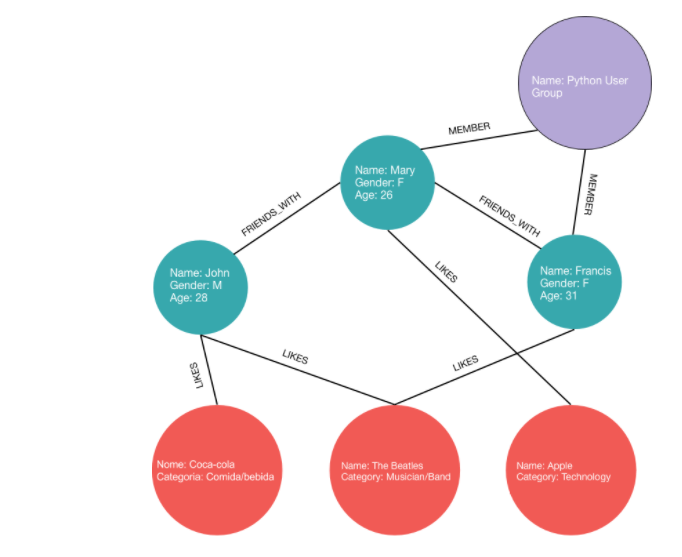

Example of a directed graph(Digraph) of the course requirements for a computer science major, where the class prerequisites graph is clearly a digraph since you must take some classes before others.  - 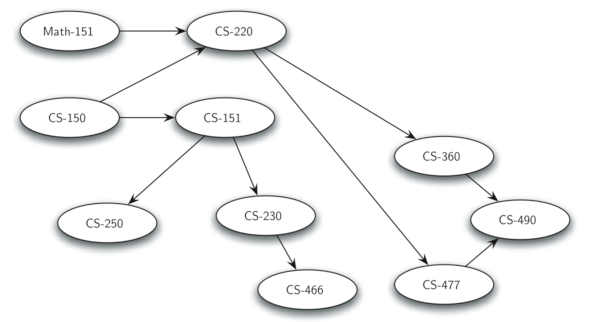

- Acyclic graph - a graph that has no cycles.
- Cyclic graph - A cycle in a graph is a path that starts and ends at the same node.

## Directed Acyclic Graph is a graph that has no cycles and the data in each node flows forward in only one direction.
It is useful to represent a complex data flows using a graph.Where: 

- Each node in the graph is a task
- The edges represent dependencies amongst tasks.
- These graphs are called computation graphs or data flow graphs and it transform the data as it flow through the graph and enable very complex numeric computations.
- Given that data only needs to be computed once on a given task and the computation then carries forward, the graph is directed and acyclic. This is why Airflow jobs are commonly referred to as “DAGs” (Directed Acyclic Graphs)

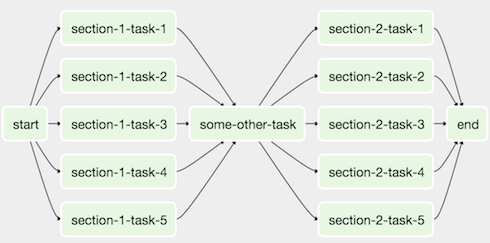

## Advantages of Airflow 
- Can handle upstream/downstream dependencies gracefully (Example: upstream missing tables)
- Easy to reprocess historical jobs by date, or re-run for specific intervals
- Jobs can pass parameters to other jobs downstream
- Handle errors and failures gracefully. Automatically retry when a task fails.
- Ease of deployment of workflow changes (continuous integration)
- Integrations with a lot of infrastructure (Hive, Presto, Druid, AWS, Google cloud, etc)
- Data sensors to trigger a DAG when data arrives
- Job testing through airflow itself
- Accessibility of log files and other meta-data through the web GUI
- Implement trigger rules for tasks
- Monitoring all jobs status in real time + Email alerts
- Community support

## Airflow Applications
- Airflow is Used by more than 200 companies: Airbnb, Yahoo, Paypal, Intel, Stripe,… in various applications inculding:
- Data warehousing: cleanse, organize, data quality check, and publish/stream data into a growing data warehouse
- Machine Learning: automate machine learning workflows, however, lately a more dedicated software/technology has been created specifically for ML pipeline called MLflow.
- Growth analytics: compute metrics around guest and host engagement as well as growth accounting
- Experimentation: compute A/B testing experimentation frameworks logic and aggregates
- Email targeting: apply rules to target and engage users through email campaigns
- Data infrastructure maintenance: database scrapes, folder cleanup, applying data retention policies, …

## Installation of airflow through docker
- Create a new directory 
- download the yaml file(from the cms, included with this notebook in same zip folder) inside the newly created directory)
- execute the following commands from your bash terminal (while in the directory you recently created)
    - mkdir -p ./dags ./logs ./plugins
    - echo -e "AIRFLOW_UID=$(id -u)" > .env
    
- Advisable to read the [documentation](https://airflow.apache.org/docs/apache-airflow/stable/howto/docker-compose/index.html).

However, please use the yaml file included in the cms rather than Airflow's default yaml file(from their website) as the one on the cms is more lightweight. Primarily because in our yaml file, we are using the local executor rather than celery executor.(line 53 in the yaml file)

What is an executor? Executors are the mechanism by which task instances get run. 

Celery executor is designed to scale the number of workers/nodes, however it requires more resources and uses more services such as redis(Database) and RabbitMQ (for message queuing). The LocalExecutor could be used instead for small, single-machine production installations. Read more about executors [here](https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/executor/index.html) and more on celery executors [here](https://airflow.apache.org/docs/apache-airflow/stable/core-concepts/executor/celery.html)

Initialise airflow
- docker-compose build 
- docker compose up airflow-init
- docker-compose up -d


### The folders included alongside this notebook shows an example of a simple pipeto line where we clean the dataset, encode it, upload to postgres and then create a dashboard in a web interface using the package 'dash'

Some notes on this example: 
- You can copy the dag file to to the dag folder you created previously. (All dags should reside there)
- You should separate the csv files from the dags, notice how there is a separate data folder.
- EXTREMELY IMPORTANT: your DAG should orchestrate the tasks and NOT your data flow. In other words, you should keep your data flow encapsulated within a single task and not orchestrate
the data transformation steps. You should almost never pass data from one task to another. For instance, note that I have not passed the df from one task to another but rather saved the csv in the first task and then loaded it in the second task from the csv file.
Examples of tasks could be extracting from 3rd party, loading to a database,loading to a cloud service,etc.

What is the issue with passing data from one task to another? 

Simply put , this is not what Airflow is designed to do. It is designed to orchestrate tasks and not move data. Also in big scale operations, tasks are usually performed on separate nodes in a cluster and thus moving data from one node to another is extremely costly from a computation standpoint, also as mentioned, Airflow is not designed to handle such task of moving data between nodes. 


Connecting 2 yaml files together(airflow and postgres database)
- Note that to connect to a postgres database we need to create a new container with postgres. We cannot use the postgres container in the yaml file of airflow as this is reserved only for the airflow services.
- To do that we will create a new yaml file and connect the postgres service in this yaml file to an external network. This network should be the network that the airflow service are running under.

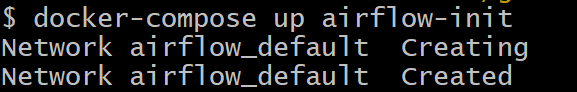

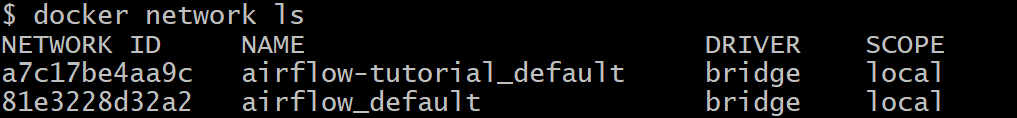

Create a new directory and place the following yaml file in it and then start up the container(docker-compose up -d)

Notice here in the last few line we created a new network which connect to an external network which is 'airflow_default'

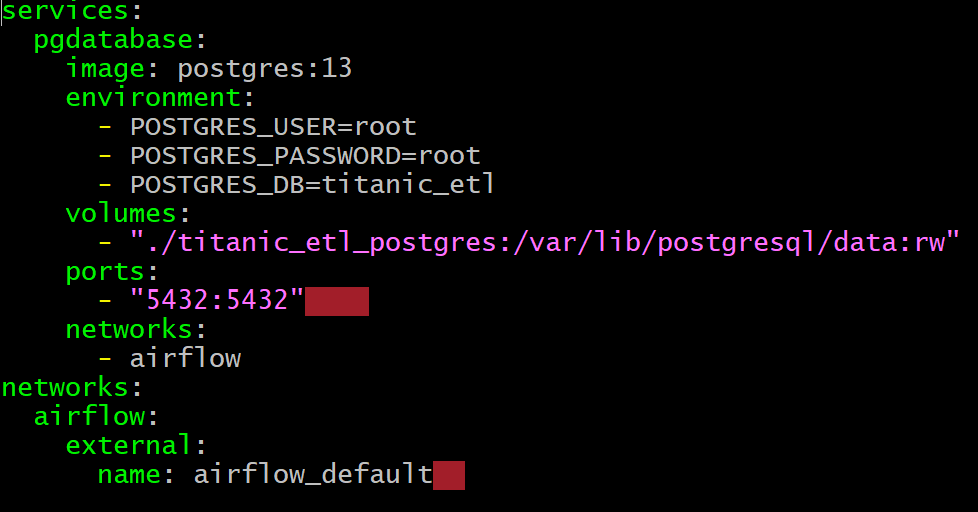

Check more dag examples - in the docker-compose file enable the following option by setting it to true and rerun the yaml file.
- close all the containers in the yaml file by doing docker-compose down
- then do docker-compose up -d

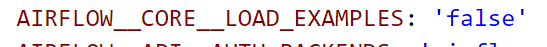